# Channel prediction lstm

In [24]:
import re

log_path = "Channel_prediction_convlstm.txt"

pattern = re.compile(
    r"\[(\d+)/(\d+)\]\s*train loss=([0-9]*\.?[0-9]+).*?\|\s*val loss=([0-9]*\.?[0-9]+)",
    re.IGNORECASE
)

rows = []
with open(log_path, "r", encoding="utf-8") as f:
    for line in f:
        m = pattern.search(line)
        if m:
            epoch = int(m.group(1))          # 500
            # total_epochs = int(m.group(2)) # 500 (필요하면 사용)
            train_loss = float(m.group(3))
            val_loss = float(m.group(4))
            rows.append((epoch, train_loss, val_loss))

# 결과 확인
print("parsed:", len(rows))
print(rows[:5])
print("last:", rows[-1])          # (epoch, train_loss, val_loss)
print("last epoch:", rows[-1][0]) # epoch 번호만
epochs = [e for e, _, _ in rows]
print("min/max:", min(epochs), max(epochs))
print("count unique:", len(set(epochs)))



parsed: 500
[(1, 0.28963, 0.261238), (2, 0.289253, 0.260723), (3, 0.28863, 0.26009), (4, 0.287991, 0.259203), (5, 0.28702, 0.257797)]
last: (500, 0.040465, 0.011107)
last epoch: 500
min/max: 1 500
count unique: 500


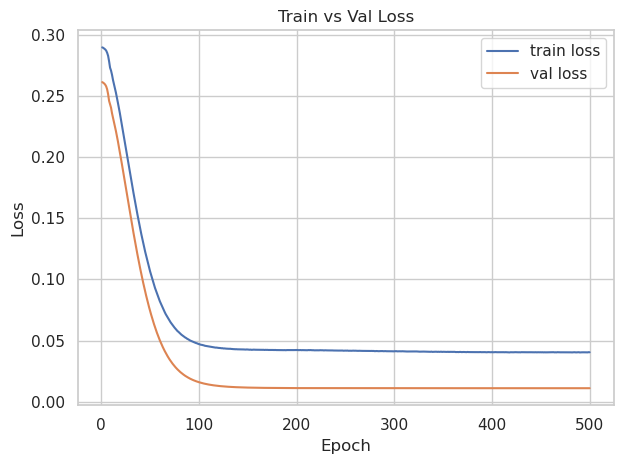

In [25]:
import matplotlib.pyplot as plt

# rows -> 리스트 분해
epochs = [e for e, tr, va in rows]
train_losses = [tr for e, tr, va in rows]
val_losses   = [va for e, tr, va in rows]

plt.figure()
plt.plot(epochs, train_losses, label="train loss")
plt.plot(epochs, val_losses, label="val loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train vs Val Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


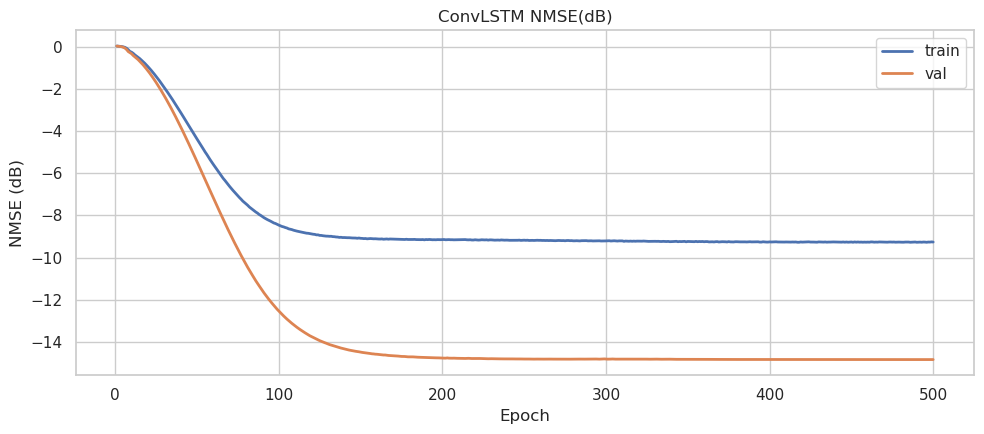

In [26]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

log_path = "Channel_prediction_convlstm.txt"

pattern = re.compile(
    r"\[(\d+)/(\d+)\]\s*"
    r"train\s+loss=([0-9]*\.?[0-9]+),\s*nmse\(dB\)=(-?[0-9]*\.?[0-9]+)\s*"
    r"\|\s*val\s+loss=([0-9]*\.?[0-9]+),\s*nmse\(dB\)=(-?[0-9]*\.?[0-9]+)",
    re.IGNORECASE
)

rows = []
with open(log_path, "r", encoding="utf-8") as f:
    for line in f:
        m = pattern.search(line)
        if m:
            epoch = int(m.group(1))
            train_nmse_db = float(m.group(4))
            val_nmse_db   = float(m.group(6))
            rows.append((epoch, train_nmse_db, val_nmse_db))

df = pd.DataFrame(rows, columns=["epoch", "train_nmse_db", "val_nmse_db"])
df = df.sort_values("epoch").reset_index(drop=True)

# long-form for seaborn
df_nmse = df.melt(
    id_vars=["epoch"],
    value_vars=["train_nmse_db", "val_nmse_db"],
    var_name="split",
    value_name="nmse_db"
)
df_nmse["split"] = df_nmse["split"].map({
    "train_nmse_db": "train",
    "val_nmse_db": "val"
})

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 4.5))

ax = sns.lineplot(
    data=df_nmse,
    x="epoch",
    y="nmse_db",
    hue="split",
    linewidth=2,   # 선 좀 굵게
    marker=None    # 마커 제거
)

ax.set_title("ConvLSTM NMSE(dB)")
ax.set_xlabel("Epoch")
ax.set_ylabel("NMSE (dB)")
ax.legend(title=None)
plt.tight_layout()
plt.show()


# gru/lstm_multi_modal

/tmp/ipykernel_880556/999377154.py:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title=None)


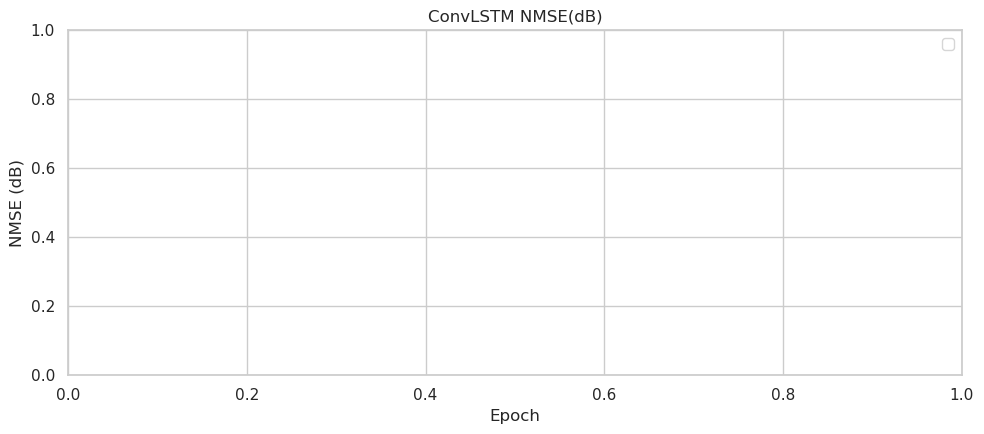

In [ ]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

log_path = "channel_prediction_gru.txt"

pattern = re.compile(
    r"\[(\d+)/(\d+)\]\s*"
    r"train\s+loss=([0-9]*\.?[0-9]+),\s*nmse\(dB\)=(-?[0-9]*\.?[0-9]+)\s*"
    r"\|\s*val\s+loss=([0-9]*\.?[0-9]+),\s*nmse\(dB\)=(-?[0-9]*\.?[0-9]+)",
    re.IGNORECASE
)

rows = []
with open(log_path, "r", encoding="utf-8") as f:
    for line in f:
        m = pattern.search(line)
        if m:
            epoch = int(m.group(1))
            train_nmse_db = float(m.group(4))
            val_nmse_db   = float(m.group(6))
            rows.append((epoch, train_nmse_db, val_nmse_db))

df = pd.DataFrame(rows, columns=["epoch", "train_nmse_db", "val_nmse_db"])
df = df.sort_values("epoch").reset_index(drop=True)

# long-form for seaborn
df_nmse = df.melt(
    id_vars=["epoch"],
    value_vars=["train_nmse_db", "val_nmse_db"],
    var_name="split",
    value_name="nmse_db"
)
df_nmse["split"] = df_nmse["split"].map({
    "train_nmse_db": "train",
    "val_nmse_db": "val"
})

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 4.5))

ax = sns.lineplot(
    data=df_nmse,
    x="epoch",
    y="nmse_db",
    hue="split",
    linewidth=2,   # 선 좀 굵게
    marker=None    # 마커 제거
)

ax.set_title("GRU NMSE(dB)")
ax.set_xlabel("Epoch")
ax.set_ylabel("NMSE (dB)")
ax.legend(title=None)
plt.tight_layout()
plt.show()


/tmp/ipykernel_880556/1392023789.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title=None)


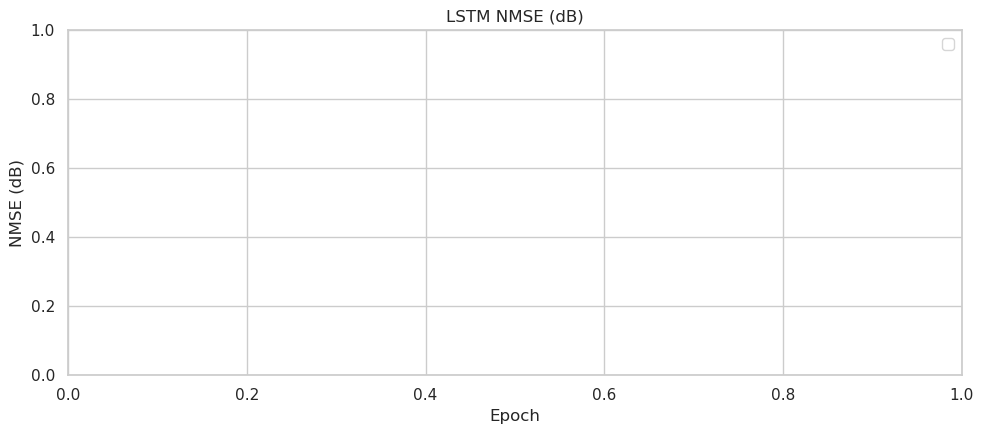

In [29]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

log_path = "channel_prediction_lstm.txt"

pattern = re.compile(
    r"\[(\d+)/(\d+)\]\s*"
    r"train\s+loss=([0-9]*\.?[0-9]+),\s*nmse\(dB\)=(-?[0-9]*\.?[0-9]+)\s*"
    r"\|\s*val\s+loss=([0-9]*\.?[0-9]+),\s*nmse\(dB\)=(-?[0-9]*\.?[0-9]+)"
    r"(?:\s*\|\s*[0-9]*\.?[0-9]+\s*s)?",  # <-- "| 85.6s" 같은 시간(옵션)
    re.IGNORECASE
)


rows = []
with open(log_path, "r", encoding="utf-8") as f:
    for line in f:
        m = pattern.search(line)
        if m:
            epoch = int(m.group(1))
            train_nmse_db = float(m.group(4))
            val_nmse_db   = float(m.group(6))
            rows.append((epoch, train_nmse_db, val_nmse_db))

df = pd.DataFrame(rows, columns=["epoch", "train_nmse_db", "val_nmse_db"])
df = df.sort_values("epoch").reset_index(drop=True)

# long-form for seaborn
df_nmse = df.melt(
    id_vars=["epoch"],
    value_vars=["train_nmse_db", "val_nmse_db"],
    var_name="split",
    value_name="nmse_db"
)
df_nmse["split"] = df_nmse["split"].map({
    "train_nmse_db": "train",
    "val_nmse_db": "val"
})

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 4.5))

ax = sns.lineplot(
    data=df_nmse,
    x="epoch",
    y="nmse_db",
    hue="split",
    linewidth=2,   # 선 좀 굵게
    marker=None    # 마커 제거
)

ax.set_title("LSTM NMSE (dB)")
ax.set_xlabel("Epoch")
ax.set_ylabel("NMSE (dB)")
ax.legend(title=None)
plt.tight_layout()
plt.show()


# LWM_multi_modal

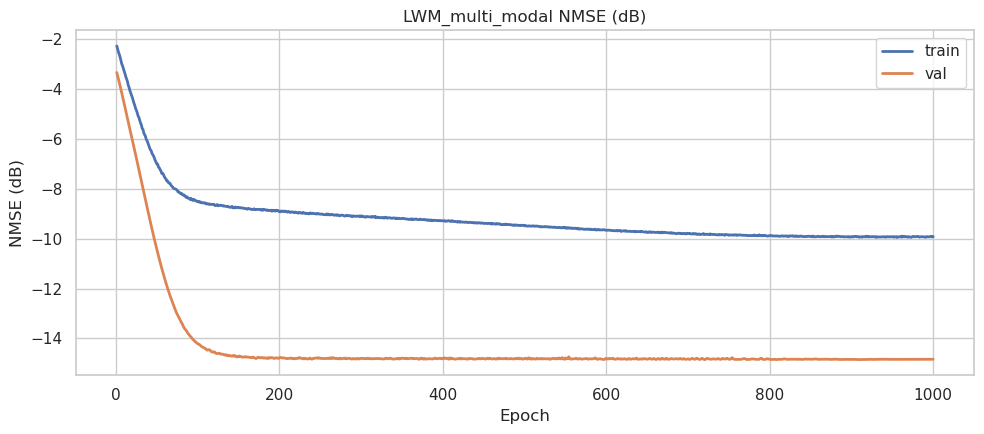

In [15]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

log_path = "channel_prediction_lwm_multi_modal.txt"

pattern = re.compile(
    r"\[(\d+)/(\d+)\]\s*"
    r"train\s+loss=([0-9]*\.?[0-9]+),\s*nmse\(dB\)=(-?[0-9]*\.?[0-9]+)\s*"
    r"\|\s*val\s+loss=([0-9]*\.?[0-9]+),\s*nmse\(dB\)=(-?[0-9]*\.?[0-9]+)",
    re.IGNORECASE
)

rows = []
with open(log_path, "r", encoding="utf-8") as f:
    for line in f:
        m = pattern.search(line)
        if m:
            epoch = int(m.group(1))
            train_nmse_db = float(m.group(4))
            val_nmse_db   = float(m.group(6))
            rows.append((epoch, train_nmse_db, val_nmse_db))

df = pd.DataFrame(rows, columns=["epoch", "train_nmse_db", "val_nmse_db"])
df = df.sort_values("epoch").reset_index(drop=True)

# long-form for seaborn
df_nmse = df.melt(
    id_vars=["epoch"],
    value_vars=["train_nmse_db", "val_nmse_db"],
    var_name="split",
    value_name="nmse_db"
)
df_nmse["split"] = df_nmse["split"].map({
    "train_nmse_db": "train",
    "val_nmse_db": "val"
})

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 4.5))

ax = sns.lineplot(
    data=df_nmse,
    x="epoch",
    y="nmse_db",
    hue="split",
    linewidth=2,   # 선 좀 굵게
    marker=None    # 마커 제거
)

ax.set_title("LWM_multi_modal NMSE (dB)")
ax.set_xlabel("Epoch")
ax.set_ylabel("NMSE (dB)")
ax.legend(title=None)
plt.tight_layout()
plt.show()


#  lwm channel prediciton

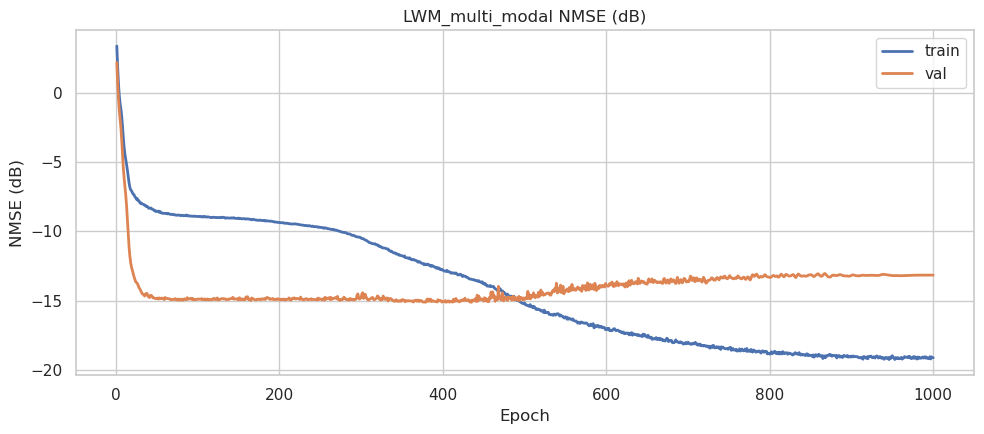

In [23]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

log_path = "channel_prediction_lwm.txt"

pattern = re.compile(
    r"\[(\d+)/(\d+)\]\s*"
    r"train\s+loss=([0-9]*\.?[0-9]+),\s*nmse\(dB\)=(-?[0-9]*\.?[0-9]+)\s*"
    r"\|\s*val\s+loss=([0-9]*\.?[0-9]+),\s*nmse\(dB\)=(-?[0-9]*\.?[0-9]+)",
    re.IGNORECASE
)

rows = []
with open(log_path, "r", encoding="utf-8") as f:
    for line in f:
        m = pattern.search(line)
        if m:
            epoch = int(m.group(1))
            train_nmse_db = float(m.group(4))
            val_nmse_db   = float(m.group(6))
            rows.append((epoch, train_nmse_db, val_nmse_db))

df = pd.DataFrame(rows, columns=["epoch", "train_nmse_db", "val_nmse_db"])
df = df.sort_values("epoch").reset_index(drop=True)

# long-form for seaborn
df_nmse = df.melt(
    id_vars=["epoch"],
    value_vars=["train_nmse_db", "val_nmse_db"],
    var_name="split",
    value_name="nmse_db"
)
df_nmse["split"] = df_nmse["split"].map({
    "train_nmse_db": "train",
    "val_nmse_db": "val"
})

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 4.5))

ax = sns.lineplot(
    data=df_nmse,
    x="epoch",
    y="nmse_db",
    hue="split",
    linewidth=2,   # 선 좀 굵게
    marker=None    # 마커 제거
)

ax.set_title("LWM_multi_modal NMSE (dB)")
ax.set_xlabel("Epoch")
ax.set_ylabel("NMSE (dB)")
ax.legend(title=None)
plt.tight_layout()
plt.show()
